In [2]:
# let's import pandas library and set options to be able to view data right in the browser
# Assign pd for a short alias for pandas library
import pandas as pd

# useful options to display more data from dataframes right in the notebook
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 500)

# in order to display plots right in the notebook:
from matplotlib import pyplot as plt
%matplotlib inline

# libraries for working with text data
from nltk.corpus import stopwords


In [3]:
from wordcloud import WordCloud, STOPWORDS
import nltk

In [4]:
REALTY_REVIEWS_PATH = r'C:\Users\asd\Desktop\data\realty.reviews.tsv'
CIAN_REVIEWS_PATH =   r'C:\Users\asd\Desktop\data\cian.reviews.tsv'

In [5]:
cian_reviews = pd.read_csv(CIAN_REVIEWS_PATH, sep = '\t')
realty_reviews = pd.read_csv(REALTY_REVIEWS_PATH, sep = '\t')

In [6]:
# let's investigate the data
# HINT for non-russian speaking students: please use https://translate.yandex.com/ or ask colleagues from your teams to 
# understand what people right in reviews
cian_reviews.head()

,day,host,rating,text,user_id_anonymized
0,18266,cian.ru,5.0,Очень удобный сайт по поиску аренды продажи квартир. Всегда информативно и большой выбор. Обьявлерия настоящие. Спасибо.,8578806629c59528c6eb047927ffdb1e
1,18311,cian.ru,5.0,"давно работаю с этим ресурсом. Одно пожелание, не задирайте слишком цены. Сейчас и так сложно зарабатывать на рынке недвижимости.",cc368ae967cf742be8128adebdd80e05
2,18317,cian.ru,5.0,Не понравилось устарели объявления и неудобная,ee2875ce8d481d25883a0fc910a322ac
3,18428,cian.ru,5.0,"Очень удобный сайт, правда несвоевременно ""подчищают""уже проданную недвижимость",4f06abd7043b6e6f80b01452da999019
4,18277,cian.ru,3.0,"Далеко не предложения по объектам по Сочи реальны, особенно это касается малометражных квартир и таун хаусов.",01f5b45a80a3472c2ba7dad022a3e544


In [7]:
realty_reviews.head()

,day,host,rating,text,user_id_anonymized
0,18250,realty.yandex.ru,5.0,"хороший сайт. жаль выглядит ,как старый .",5cabdd902cfaa9a4d607e700b54b2dd8
1,18145,realty.yandex.ru,5.0,"Отличная возможность найти то, что нужно! Много опций и фильтров по делу!",edb7714834188ea31b4a36466bb17946
2,18281,realty.yandex.ru,5.0,Подобрать недвижимость - это сюда!),2a9ddc10a9cc3709fa63c48c4654de67
3,18301,realty.yandex.ru,1.0,Не удобно пользоваться,b6ae52a4166122783272b64a4f71e5a2
4,18259,realty.yandex.ru,5.0,"Работают на здорово !!! без проблем, всем советую.",b5b2c8e2f03275d4446ef98a7fdba879


In [8]:
cian_reviews.host.value_counts()

cian.ru    4333
Name: host, dtype: int64

In [9]:
realty_reviews.host.value_counts()

realty.yandex.ru    2476
Name: host, dtype: int64

### Let's look at what are the popular words in CIAN and Yandex.Realty reviews

In [10]:
# get stopwords for russian language
nltk.download("stopwords")
russian_stopwords = stopwords.words("russian")

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     远程主机强迫关闭了一个现有的连接。>


In [11]:
# let's look at what particular words are put in this list and check whether it makes sense
# tak top 10 elements from the list
russian_stopwords[0:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [12]:
# create the WordCloud using russian stopwords to see which words are used in reviews:
wordcloud = WordCloud(background_color='black', stopwords = russian_stopwords,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

In [13]:
list(realty_reviews.loc[:, 'text'])

['хороший сайт.    жаль выглядит ,как старый .',
 'Отличная возможность найти то, что нужно! Много опций и фильтров по делу!',
 'Подобрать недвижимость - это сюда!)',
 'Не удобно пользоваться',
 'Работают на здорово !!! без проблем, всем советую.',
 'Профессиональный подход каждому ученику, хорошие тренировки, заслуженный тренер России, ученики выигрывали 🇷🇺 чемпионат России, чемпионат Европы, пожелаем чтоб выиграли чемпионат мира и олимпийские игры. Вперёд Сапсан 👍✌️💪',
 'Удобный понравился',
 'Супер, но пока еще не пользуюсь !!!',
 'Стало лучше',
 'Найти желаемую квартиру вполне реально! Нашла для себя подходящие варианты.',
 'Всё понятно',
 'можно подобрать недвижимость по своему кошильку',
 'Всем привет Я уже полтора года здесь работаю Мне очень нравится',
 'Спасибо всем кто создал этот сайт бистро и без посредников нашли квартиру прямо у хозяев',
 'Хуже чем ютуб и яндекс музыка',
 'Пока не развит так как Авито или циан',
 'Очень мало откликов на объявления. значит на сайте нет нас

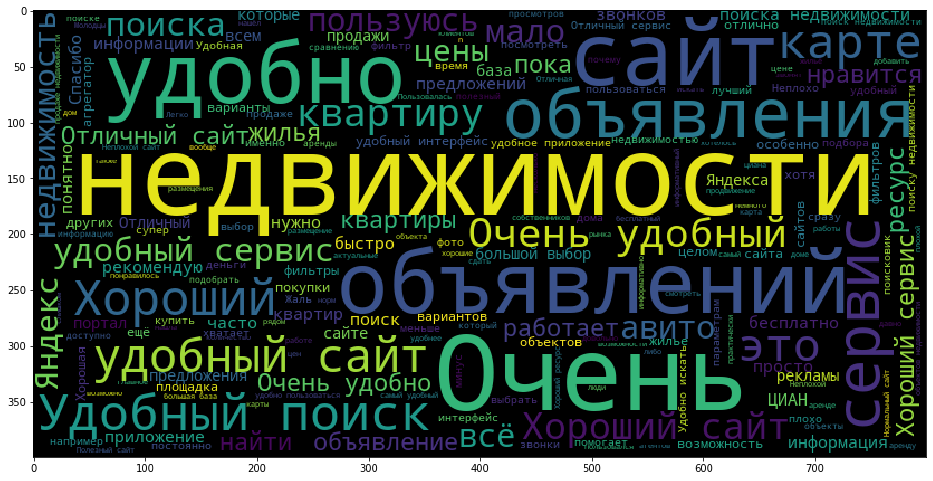

In [14]:
plt.figure(figsize=(16, 12))
# take all rows from 'text' column and generate WordCloud
all_texts = list(realty_reviews.loc[:, 'text'])
wordcloud.generate(" ".join(all_texts))
plt.imshow(wordcloud)

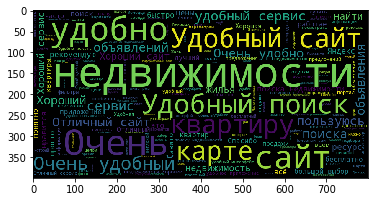

In [15]:
all_5_star_texts = list(realty_reviews.loc[realty_reviews['rating'] == 5, 'text'])
wordcloud.generate(" ".join(all_5_star_texts))
plt.imshow(wordcloud);

In [16]:
# let's create a method to generate wordcloud from reviews from different ratings:
def gen_wordcloud(df, rating = None, text_column_name = 'text'):
    if rating is None:
        all_texts = list(df.loc[:, text_column_name])
    else:
        all_texts = list(df.loc[df['rating'] == rating, text_column_name])
    wordcloud.generate(" ".join(all_texts))
    plt.imshow(wordcloud)

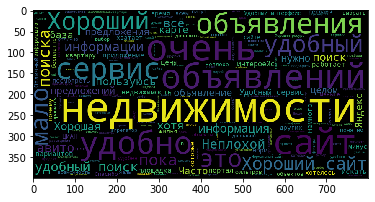

In [17]:
gen_wordcloud(realty_reviews, rating = 4)

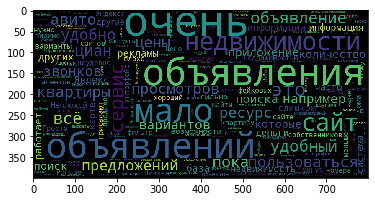

In [18]:
gen_wordcloud(realty_reviews, rating = 3)

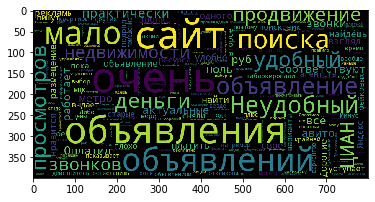

In [19]:
gen_wordcloud(realty_reviews, rating = 2)

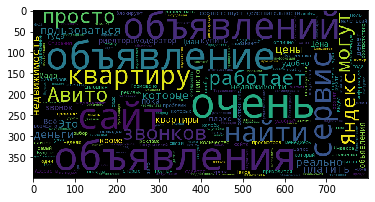

In [20]:
gen_wordcloud(realty_reviews, rating = 1)

### Self-control stops
- Generate WordCloud for all CIAN reviews and CIAN reviews for each rating from 5 to 1. How are the most popular words used different from those in Yandex.Realty reviews?

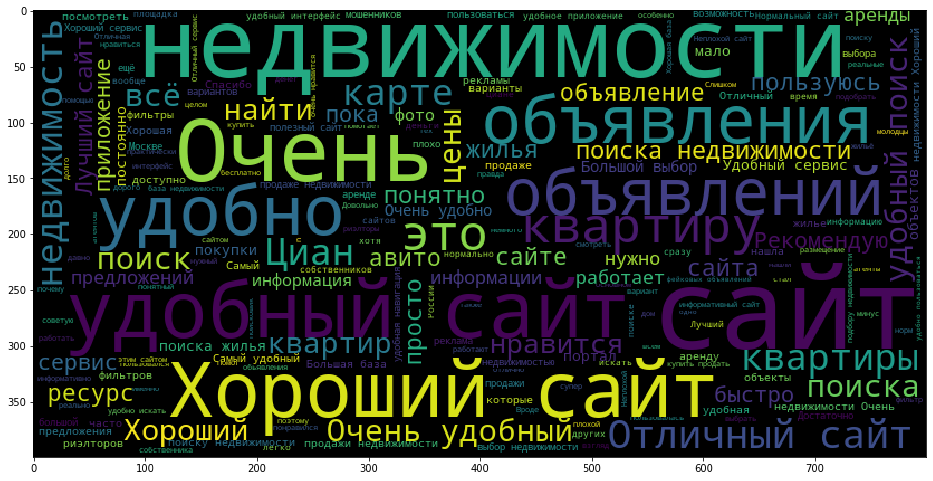

In [21]:
plt.figure(figsize=(16, 12))
# take all rows from 'text' column and generate WordCloud
all_texts = list(cian_reviews.loc[:, 'text'])
wordcloud.generate(" ".join(all_texts))
plt.imshow(wordcloud)

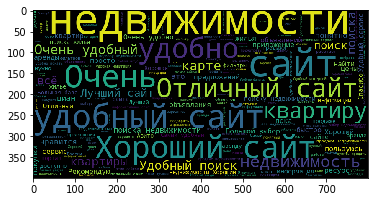

In [22]:
gen_wordcloud(cian_reviews, rating =5)

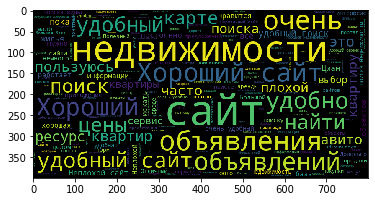

In [23]:
gen_wordcloud(cian_reviews, rating =4)

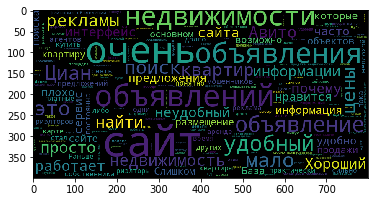

In [24]:
gen_wordcloud(cian_reviews, rating =3)

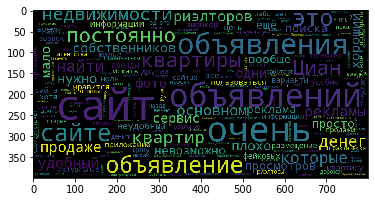

In [25]:
gen_wordcloud(cian_reviews, rating =2)

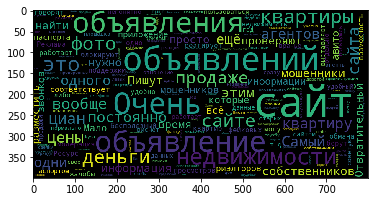

In [26]:
gen_wordcloud(cian_reviews, rating =1)

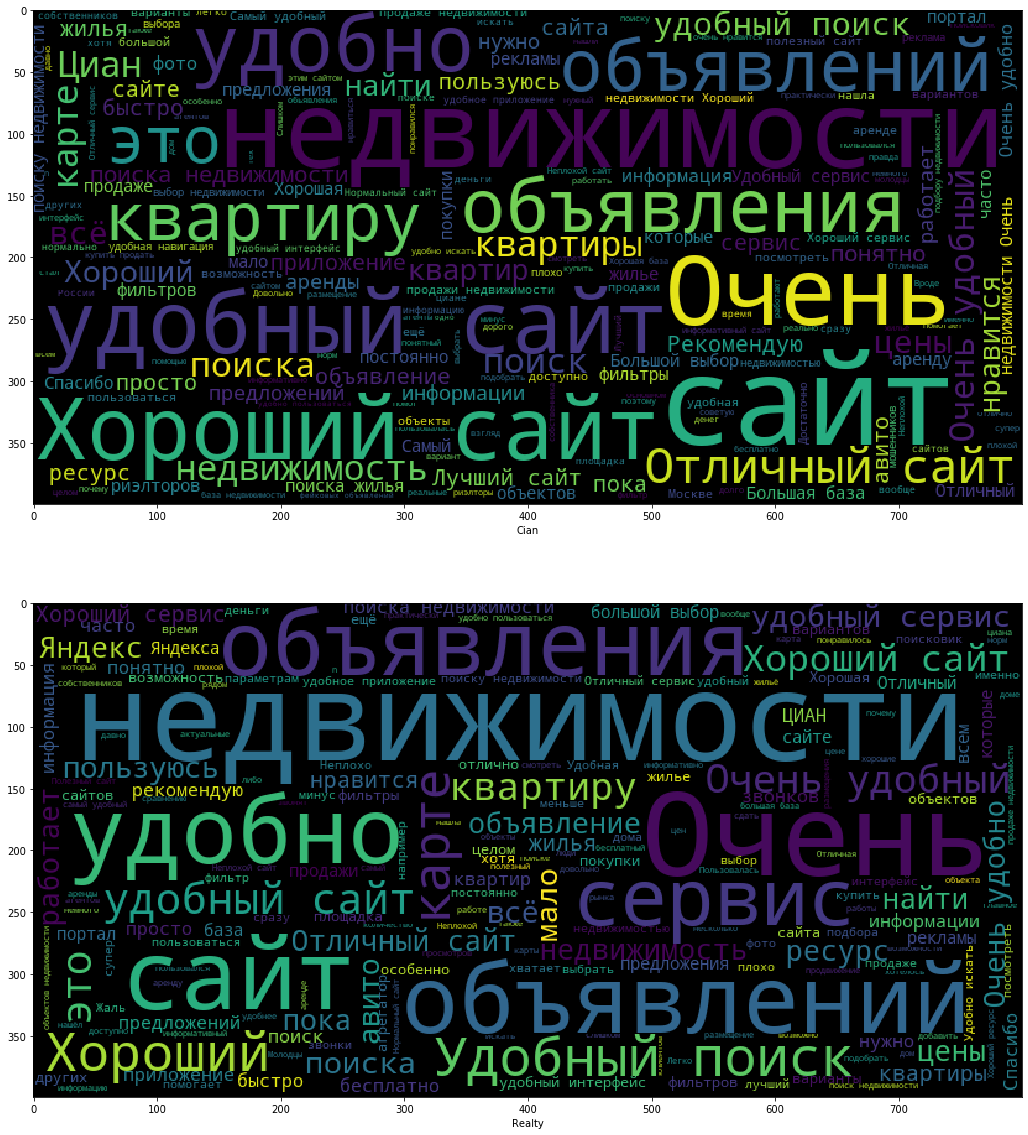

In [27]:
plt.figure(figsize=(20, 20))
# take all rows from 'text' column and generate WordCloud
plt.subplot(2,1,1)
all_texts = list(cian_reviews.loc[:, 'text'])
wordcloud.generate(" ".join(all_texts))
plt.xlabel('Cian')
plt.imshow(wordcloud)

plt.subplot(2,1,2)
all_texts = list(realty_reviews.loc[:, 'text'])
wordcloud.generate(" ".join(all_texts))
plt.xlabel('Realty')
plt.imshow(wordcloud)

### Self-control stops
- Generate WordCloud for all CIAN reviews and CIAN reviews for each rating from 5 to 1. How are the most popular words used different from those in Yandex.Realty reviews?


Although the popular words in Cian are same to that in Yandex_Realty, they have different frequency.

#### 1st step is to get a lemmatized list of tokens from text. It's important to count same words in different forms as the same word

In [28]:
from pymystem3 import Mystem
from string import punctuation


In [29]:
mystem = Mystem() 

In [30]:
#Create lemmatizer


#Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text



In [31]:
#Examples    
preprocess_text("Ну что сказать, я вижу кто-то наступил на грабли, Ты разочаровал меня, ты был натравлен.")

'сказать видеть кто-то наступать грабли разочаровывать натравлять'

In [32]:
# preprocess all texts and save them in separate column
realty_reviews['preprocessed_text'] = realty_reviews['text'].map(preprocess_text)

In [33]:
cian_reviews['preprocessed_text'] = cian_reviews['text'].map(preprocess_text)

In [34]:
# see sample of preprocessing result:
realty_reviews['preprocessed_text'].sample(5)

2419    точно показывать аналитика звонок объявление
2172                                           очень
917                             очень удобный сервис
716        возможность оплачивать реклама приложение
1858                     отличный сайт удобный поиск
Name: preprocessed_text, dtype: object

#### 2nd step: get most popular n-grams from reviews with different rating

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import collections

In [36]:
def get_top_n_grams(df_reviews, 
                    rating = 5, 
                    ngrams = 2, 
                    rating_col_name = 'rating', 
                    text_col_name = 'preprocessed_text'):
    '''
    returns most popular n-grams used in reviews
    support 1,2,3-grams
    '''
    counts = collections.Counter()
    for review in df_reviews[df_reviews[rating_col_name] == rating][text_col_name]:
        words = nltk.word_tokenize(review)
        if ngrams == 2:
            counts.update(nltk.bigrams(words))
        elif ngrams == 1:
            counts.update(words)
        elif ngrams == 3:
            counts.update(nltk.trigrams(words))
    counts_popular = {k: v for k, v in counts.items() if v > 1}
#     sorted_counts = {k: v for k, v in sorted(counts_popular.items(), key=lambda item: item[1], reverse = True) }
    sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse = True) }
    return sorted_counts
    

In [37]:
nltk.download("punkt")
get_top_n_grams(df_reviews=realty_reviews, rating = 5, ngrams=3)

[nltk_data] Error loading punkt: <urlopen error [WinError 10054]
[nltk_data]     远程主机强迫关闭了一个现有的连接。>


{('!', '!', '!'): 36,
 ('сайт', 'поиск', 'недвижимость'): 23,
 ('очень', 'удобный', 'сервис'): 18,
 ('сервис', 'поиск', 'недвижимость'): 15,
 ('удобный', 'сайт', 'поиск'): 15,
 ('удобный', 'поиск', 'недвижимость'): 14,
 ('очень', 'удобный', 'сайт'): 13,
 ('удобный', 'сервис', 'поиск'): 13,
 ('очень', 'удобный', 'поиск'): 11,
 ('удобный', 'поиск', 'карта'): 9,
 ('хороший', 'сайт', 'недвижимость'): 9,
 ('отличный', 'сайт', 'поиск'): 8,
 ('хороший', 'удобный', 'сайт'): 7,
 ('хороший', 'сервис', 'удобный'): 6,
 (')', ')', ')'): 6,
 ('большой', 'выбор', 'недвижимость'): 6,
 ('хороший', 'сервис', 'недвижимость'): 6,
 ('сайт', 'подбор', 'недвижимость'): 5,
 ('очень', 'удобно', 'пользоваться'): 5,
 ('поиск', 'недвижимость', 'весь'): 5,
 ('очень', 'удобный', 'приложение'): 5,
 ('сервис', 'поиск', 'жилье'): 5,
 ('хороший', 'поисковик', 'недвижимость'): 5,
 ('очень', 'удобный', 'интерфейс'): 4,
 ('самый', 'хороший', 'сайт'): 4,
 ('сайт', 'большой', 'выбор'): 4,
 ('отличный', 'сайт', 'удобный'): 4

Self-control stops

1.Analyze top 2-grams and 3-grams for both CIAN and Yandex.Realty for 5-star reviews and 1-star reviews. What are the common things people say about services and what are the differencies?

2.What are the mean and median ratings for CIAN and Yandex.Realty reviews? How the mean and median ratings change if we look just at recent reviews for the last year from 2019-10-10? Hint: to filter by date you can just use date in yyyy-mm-dd format lik this - realty_reviews[realty_reviews.day >= '2019-10-01'])

3.Some authors have used both services and wrote their reviews. What are the mean and median ratings for CIAN and Yandex.Realty reviews written by the same authors?

1.Analyze top 2-grams and 3-grams for both CIAN and Yandex.Realty for 5-star reviews and 1-star reviews. What are the common things people say about services and what are the differencies?

In [38]:
get_top_n_grams(df_reviews=realty_reviews, rating = 5, ngrams=3)

{('!', '!', '!'): 36,
 ('сайт', 'поиск', 'недвижимость'): 23,
 ('очень', 'удобный', 'сервис'): 18,
 ('сервис', 'поиск', 'недвижимость'): 15,
 ('удобный', 'сайт', 'поиск'): 15,
 ('удобный', 'поиск', 'недвижимость'): 14,
 ('очень', 'удобный', 'сайт'): 13,
 ('удобный', 'сервис', 'поиск'): 13,
 ('очень', 'удобный', 'поиск'): 11,
 ('удобный', 'поиск', 'карта'): 9,
 ('хороший', 'сайт', 'недвижимость'): 9,
 ('отличный', 'сайт', 'поиск'): 8,
 ('хороший', 'удобный', 'сайт'): 7,
 ('хороший', 'сервис', 'удобный'): 6,
 (')', ')', ')'): 6,
 ('большой', 'выбор', 'недвижимость'): 6,
 ('хороший', 'сервис', 'недвижимость'): 6,
 ('сайт', 'подбор', 'недвижимость'): 5,
 ('очень', 'удобно', 'пользоваться'): 5,
 ('поиск', 'недвижимость', 'весь'): 5,
 ('очень', 'удобный', 'приложение'): 5,
 ('сервис', 'поиск', 'жилье'): 5,
 ('хороший', 'поисковик', 'недвижимость'): 5,
 ('очень', 'удобный', 'интерфейс'): 4,
 ('самый', 'хороший', 'сайт'): 4,
 ('сайт', 'большой', 'выбор'): 4,
 ('отличный', 'сайт', 'удобный'): 4

In [39]:
get_top_n_grams(df_reviews=realty_reviews, rating = 5, ngrams=2)

{('очень', 'удобный'): 86,
 ('удобный', 'поиск'): 79,
 ('поиск', 'недвижимость'): 74,
 ('удобный', 'сайт'): 71,
 ('!', '!'): 69,
 ('хороший', 'сайт'): 63,
 ('удобный', 'сервис'): 63,
 ('отличный', 'сайт'): 56,
 ('хороший', 'сервис'): 53,
 ('очень', 'удобно'): 47,
 ('сайт', 'недвижимость'): 31,
 ('сайт', 'поиск'): 31,
 ('большой', 'выбор'): 29,
 ('сервис', 'поиск'): 23,
 ('отличный', 'сервис'): 20,
 ('удобный', 'приложение'): 19,
 ('поиск', 'карта'): 17,
 ('удобный', 'интерфейс'): 17,
 ('поиск', 'жилье'): 17,
 ('находить', 'квартира'): 16,
 (')', ')'): 16,
 ('очень', 'хороший'): 16,
 ('продажа', 'недвижимость'): 15,
 ('удобно', 'искать'): 15,
 ('объявление', 'недвижимость'): 14,
 ('удобно', 'пользоваться'): 14,
 ('яндекс', 'недвижимость'): 14,
 ('поиск', 'квартира'): 14,
 ('выбор', 'недвижимость'): 13,
 ('подбор', 'недвижимость'): 13,
 ('хороший', 'удобный'): 12,
 ('удобный', 'фильтр'): 12,
 ('полезный', 'сайт'): 11,
 ('хороший', 'приложение'): 11,
 ('объект', 'недвижимость'): 11,
 ('ра

In [40]:
get_top_n_grams(df_reviews=cian_reviews, rating = 5, ngrams=3)

{('сайт', 'поиск', 'недвижимость'): 71,
 ('хороший', 'сайт', 'недвижимость'): 59,
 ('очень', 'удобный', 'сайт'): 47,
 ('удобный', 'сайт', 'поиск'): 46,
 ('!', '!', '!'): 43,
 ('хороший', 'сайт', 'поиск'): 43,
 ('отличный', 'сайт', 'поиск'): 27,
 ('сайт', 'поиск', 'жилье'): 26,
 ('сайт', 'подбор', 'недвижимость'): 23,
 ('отличный', 'сайт', 'недвижимость'): 21,
 (')', ')', ')'): 19,
 ('сервис', 'поиск', 'недвижимость'): 18,
 ('самый', 'удобный', 'сайт'): 17,
 ('удобный', 'сервис', 'поиск'): 17,
 ('очень', 'удобный', 'поиск'): 16,
 ('большой', 'выбор', 'недвижимость'): 15,
 ('сайт', 'поиск', 'квартира'): 15,
 ('хороший', 'сайт', 'подбор'): 14,
 ('самый', 'хороший', 'сайт'): 14,
 ('продажа', 'аренда', 'недвижимость'): 14,
 ('хороший', 'сайт', 'удобный'): 14,
 ('сайт', 'удобный', 'поиск'): 13,
 ('хороший', 'удобный', 'сайт'): 12,
 ('удобный', 'сайт', 'недвижимость'): 11,
 ('удобный', 'поиск', 'карта'): 11,
 ('удобный', 'сайт', 'хороший'): 11,
 ('очень', 'хороший', 'сайт'): 11,
 ('покупка', 

In [41]:
get_top_n_grams(df_reviews=cian_reviews, rating = 5, ngrams=2)

{('хороший', 'сайт'): 294,
 ('удобный', 'сайт'): 220,
 ('сайт', 'поиск'): 141,
 ('очень', 'удобный'): 139,
 ('сайт', 'недвижимость'): 138,
 ('отличный', 'сайт'): 137,
 ('поиск', 'недвижимость'): 132,
 ('удобный', 'поиск'): 105,
 ('!', '!'): 87,
 ('поиск', 'жилье'): 57,
 ('продажа', 'недвижимость'): 55,
 ('большой', 'выбор'): 52,
 ('удобный', 'сервис'): 51,
 (')', ')'): 49,
 ('самый', 'удобный'): 45,
 ('сайт', 'удобный'): 45,
 ('очень', 'удобно'): 43,
 ('поиск', 'квартира'): 41,
 ('находить', 'квартира'): 38,
 ('большой', 'база'): 38,
 ('подбор', 'недвижимость'): 35,
 ('сайт', 'хороший'): 35,
 ('поиск', 'карта'): 33,
 ('сервис', 'поиск'): 33,
 ('удобный', 'приложение'): 31,
 ('хороший', 'сервис'): 31,
 ('выбор', 'недвижимость'): 30,
 ('купить', 'продавать'): 29,
 ('полезный', 'сайт'): 28,
 ('удобный', 'интерфейс'): 27,
 ('удобный', 'навигация'): 27,
 ('самый', 'хороший'): 26,
 ('сайт', 'подбор'): 26,
 ('очень', 'хороший'): 26,
 ('сайт', 'продажа'): 26,
 ('база', 'недвижимость'): 26,
 ('

In [42]:
get_top_n_grams(df_reviews=realty_reviews, rating = 1, ngrams=3)

{('!', '!', '!'): 11,
 (')', ')', ')'): 2,
 ('номер', 'квартира', 'кадастровый'): 2,
 ('квартира', 'кадастровый', 'номер'): 2,
 ('realty', 'yandex', 'ru'): 2,
 ('находить', 'желаемый', 'квартира'): 1,
 ('желаемый', 'квартира', 'вполне'): 1,
 ('квартира', 'вполне', 'реально'): 1,
 ('вполне', 'реально', 'находить'): 1,
 ('реально', 'находить', 'подходящий'): 1,
 ('находить', 'подходящий', 'вариант'): 1,
 ('размещать', 'объявление', 'аренда'): 1,
 ('объявление', 'аренда', 'оплачивать'): 1,
 ('аренда', 'оплачивать', 'активировать'): 1,
 ('оплачивать', 'активировать', '...'): 1,
 ('активировать', '...', 'понимать'): 1,
 ('огромный', 'количество', 'старый'): 1,
 ('количество', 'старый', 'актуальный'): 1,
 ('старый', 'актуальный', 'объявление'): 1,
 ('актуальный', 'объявление', 'составление'): 1,
 ('объявление', 'составление', 'жалоба'): 1,
 ('составление', 'жалоба', 'редактирование'): 1,
 ('жалоба', 'редактирование', 'происходить'): 1,
 ('максимально', 'неудобный', 'некорректный'): 1,
 ('неу

In [43]:
get_top_n_grams(df_reviews=realty_reviews, rating = 1, ngrams=2)

{('!', '!'): 20,
 ('размещать', 'объявление'): 5,
 ('огромный', 'количество'): 3,
 (')', ')'): 3,
 ('соответствовать', 'действительность'): 3,
 ('удобно', 'пользоваться'): 2,
 ('никто', 'пользоваться'): 2,
 ('объявление', 'хотеть'): 2,
 ('давать', 'возможность'): 2,
 (':', '-'): 2,
 ('каждый', 'звонок'): 2,
 ('объявление', 'который'): 2,
 ('размещение', 'объявление'): 2,
 ('блокировать', 'объявление'): 2,
 ('полный', 'фигня'): 2,
 ('ничто', 'работать'): 2,
 ('объявление', 'точный'): 2,
 ('плохой', 'сайт'): 2,
 ('продавец', 'покупатель'): 2,
 ('мочь', 'купить'): 2,
 ('спина', 'ломать'): 2,
 ('номер', 'квартира'): 2,
 ('квартира', 'кадастровый'): 2,
 ('кадастровый', 'номер'): 2,
 ('realty', 'yandex'): 2,
 ('yandex', 'ru'): 2,
 ('находить', 'желаемый'): 1,
 ('желаемый', 'квартира'): 1,
 ('квартира', 'вполне'): 1,
 ('вполне', 'реально'): 1,
 ('реально', 'находить'): 1,
 ('находить', 'подходящий'): 1,
 ('подходящий', 'вариант'): 1,
 ('объявление', 'аренда'): 1,
 ('аренда', 'оплачивать'): 1,

In [44]:
get_top_n_grams(df_reviews=cian_reviews, rating = 1, ngrams=3)

{('!', '!', '!'): 17,
 ('(', '(', '('): 6,
 (')', ')', ')'): 3,
 ('сайт', '!', '!'): 3,
 ('...', '...', '...'): 2,
 ('объявление', 'несуществующий', 'объект'): 2,
 ('публикация', 'объявление', 'продажа'): 2,
 ('подавать', 'объявление', 'нужно'): 2,
 ('медленный', 'сайт', 'уснуть'): 2,
 ('?', '?', '?'): 2,
 ('отдельно', ',', '``'): 2,
 ('брать', 'деньги', 'объявление'): 1,
 ('деньги', 'объявление', 'что-то'): 1,
 ('объявление', 'что-то', 'померещиться'): 1,
 ('что-то', 'померещиться', '``'): 1,
 ('померещиться', '``', ','): 1,
 ('``', ',', 'сразу'): 1,
 (',', 'сразу', 'блокировать'): 1,
 ('сразу', 'блокировать', 'деньги'): 1,
 ('блокировать', 'деньги', 'возвращать'): 1,
 ('деньги', 'возвращать', 'возможность'): 1,
 ('возвращать', 'возможность', 'доказывать'): 1,
 ('возможность', 'доказывать', 'воочию'): 1,
 ('доказывать', 'воочию', 'давать'): 1,
 ('задолбать', 'свой', 'звонок'): 1,
 ('свой', 'звонок', '!'): 1,
 ('звонок', '!', '!'): 1,
 ('!', '!', 'продавать'): 1,
 ('!', 'продавать', 'к

In [45]:
get_top_n_grams(df_reviews=cian_reviews, rating = 1, ngrams=2)

{('!', '!'): 33,
 ('объявление', 'продажа'): 8,
 ('(', '('): 8,
 ('размещать', 'объявление'): 5,
 ('сайт', 'недвижимость'): 5,
 (')', ')'): 5,
 ('...', '.'): 5,
 ('служба', 'поддержка'): 4,
 ('выставлять', 'объявление'): 4,
 ('фото', 'паспорт'): 4,
 ('...', '...'): 4,
 ('т', 'д'): 4,
 ('недостоверный', 'информация'): 3,
 ('подавать', 'объявление'): 3,
 ('бесполезный', 'сайт'): 3,
 ('плохой', 'сайт'): 3,
 ('сайт', '!'): 3,
 ('сайт', 'который'): 3,
 ('модерация', 'объявление'): 3,
 ('половина', 'объявление'): 3,
 ('?', '?'): 3,
 ('отдельно', ','): 3,
 ('соответствовать', 'действительность'): 3,
 ('брать', 'деньги'): 2,
 ('``', ','): 2,
 ('деньги', 'возвращать'): 2,
 ('продавать', 'квартира'): 2,
 ('реальный', 'объявление'): 2,
 ('размещать', 'бесплатно'): 2,
 ('очень', 'обман'): 2,
 ('свой', 'объявление'): 2,
 ('неактуальный', 'информация'): 2,
 ('наш', 'деньги'): 2,
 ('информация', 'недвижимость'): 2,
 ('объявление', 'заблокировать'): 2,
 ('объявление', 'который'): 2,
 ('объявление', 'р

### 1.What are the common things people say about services and what are the differencies?
 
Rating =5
 
Users of both have a positive evaluation of the website and search


Rating =1

Users of both complain the adds .Except adds,there are more negative reviews about sales in Cian while uses of Realty talk about apartment.  



### 2.What are the mean and median ratings for CIAN and Yandex.Realty reviews? How the mean and median ratings change if we look just at recent reviews for the last year from 2019-10-10? Hint: to filter by date you can just use date in yyyy-mm-dd format lik this - realty_reviews[realty_reviews.day >= '2019-10-01'])


In [46]:
#mean and median

print(realty_reviews['rating'].describe())
print('-------------------------------')
print(cian_reviews['rating'].describe())


count    2476.000000
mean        4.305331
std         1.053166
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
-------------------------------
count    4333.000000
mean        4.300715
std         1.105803
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


In [47]:
def date(para):
    delta = pd.Timedelta(str(para)+'days')
    time = pd.to_datetime('1969-12-30') + delta
    return time

In [48]:
realty_reviews['day']=realty_reviews['day'].apply(date)
cian_reviews['day']=cian_reviews['day'].apply(date)

In [49]:
realty_reviews[realty_reviews['day']>='2019-10-01']['rating'].describe()

count    1598.000000
mean        4.284105
std         1.081818
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [50]:
cian_reviews[cian_reviews['day']>='2019-10-01']['rating'].describe()


count    2338.000000
mean        4.305817
std         1.123968
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

### 2.What are the mean and median ratings for CIAN and Yandex.Realty reviews? How the mean and median ratings change if we look just at recent reviews for the last year from 2019-10-10? Hint: to filter by date you can just use date in yyyy-mm-dd format lik this - realty_reviews[realty_reviews.day >= '2019-10-01'])

Realty:  mean of rating =4.305331    median of rating=5

CIAN:   mean of rating =4.300715    median of rating=5


From 2019-10-10

Realty:  mean of rating =4.284105   median of rating=5

CIAN:   mean of rating =4.305817    median of rating=5



### 3.Some authors have used both services and wrote their reviews. What are the mean and median ratings for CIAN and Yandex.Realty reviews written by the same authors?

In [51]:
user_R=realty_reviews['user_id_anonymized']
user_C=cian_reviews['user_id_anonymized']

In [52]:
same_users=list(set(user_R).intersection(set(user_C)))

In [53]:
realty_reviews.loc[ realty_reviews['user_id_anonymized'].isin (same_users) ]['rating'].describe()

count    371.000000
mean       4.210243
std        1.104782
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [54]:
cian_reviews.loc[ cian_reviews['user_id_anonymized'].isin (same_users) ]['rating'].describe()

count    371.000000
mean       4.221024
std        1.085377
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

### 3.Some authors have used both services and wrote their reviews. What are the mean and median ratings for CIAN and Yandex.Realty reviews written by the same authors?

Same authors

Realty:  mean of rating =4.210243 median of rating=5

CIAN:   mean of rating =4.221024  median of rating=5

### Self-control stops

- Analyze top 2-grams and 3-grams for both CIAN and Yandex.Realty for 5-star reviews and 1-star reviews. What are the common things people say about services and what are the differencies?

Rating =5
 
Users of both have a positive evaluation of the website and search


Rating =1

Users of both complain the adds .Except adds,there are more negative reviews about sales in Cian while uses of Realty talk about apartment. 


- What are the mean and median ratings for CIAN and Yandex.Realty reviews? How the mean and median ratings change if we look just at recent reviews for the last year from 2019-10-10? Hint: to filter by date you can just use date in yyyy-mm-dd format lik this - realty_reviews[realty_reviews.day >= '2019-10-01'])
Realty:  mean of rating =4.305331    median of rating=5

CIAN:   mean of rating =4.300715    median of rating=5


From 2019-10-10

Realty:  mean of rating =4.284105   median of rating=5

CIAN:   mean of rating =4.305817    median of rating=5


- Some authors have used both services and wrote their reviews. What are the mean and median ratings for CIAN and Yandex.Realty reviews written by the same authors?

Same authors

Realty:  mean of rating =4.210243 median of rating=5

CIAN:   mean of rating =4.221024  median of rating=5

### Try to build classifier for cian/realty reviews and analyze factors
#### prepare the dataset

In [55]:
df_all = pd.concat([cian_reviews, realty_reviews])

In [56]:
len(df_all)

6809

In [57]:
list(df_all)

['day', 'host', 'rating', 'text', 'user_id_anonymized', 'preprocessed_text']

In [58]:
# make a label for classified
df_all['label_yandex'] = df_all['host'].map({'cian.ru': 0, 'realty.yandex.ru': 1})

In [59]:
df_all.sample(5)

,day,host,rating,text,user_id_anonymized,preprocessed_text,label_yandex
891,2019-07-10,realty.yandex.ru,5.0,Хороший портал с удобным поиском.,efc0c4221188f6df0ca4ac097165f8cd,хороший портал удобный поиск,1
53,2020-09-30,cian.ru,3.0,Не всегда показывает нужные запросы.,0fccef5e72ac793563d161c5bc7b7ec1,показывать нужный запрос,0
566,2019-01-06,cian.ru,4.0,"Последнее время начали всплывать предложения, непонятно как их убрать...",8380ab61086bfba557329163c1827793,последний время начинать всплывать предложение непонятно убирать ...,0
1170,2019-09-14,cian.ru,1.0,Вот вообще никакой сайт. Звонков с него ноль,0dc71490ee384b648d6c6c33fc17e938,вообще никакой сайт звонок ноль,0
1611,2019-12-24,cian.ru,5.0,Информативный сайт с актуальными данными,3e4af36371d41ea4f49c89be46efa911,информативный сайт актуальный данные,0


#### prepare testing and training datasets and train the model to classify whether review is written about Yandex.Realty

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [61]:
stopwords_classifier = ['яндекс', 'сервис', 'саит']
def train_text_classfier(df, label = 'label_yandex'):
    '''
    preprocessed text and label_yandex should be in passed df
    '''
    xtrain, xvalid, ytrain, yvalid = train_test_split(df.preprocessed_text.values, df[label].values, 
                                                  stratify=df.label_yandex.values, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)
    tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                      stop_words=stopwords_classifier)

    # Fitting TF-IDF to both training and test sets (semi-supervised learning)
    tfv.fit(list(xtrain) + list(xvalid))
    xtrain_tfv =  tfv.transform(xtrain) 
    xvalid_tfv = tfv.transform(xvalid)
    
    # Fitting a simple Logistic Regression on TFIDF
    clf = LogisticRegression(C=1.0)
    clf.fit(xtrain_tfv, ytrain)

    predictions = clf.predict(xvalid_tfv)
                          
    return clf, tfv, yvalid, predictions 

In [62]:
clf, tfv, yvalid, predictions = train_text_classfier(df_all)

F:\course python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
confusion_matrix(yvalid, predictions)

array([[391,  42],
       [193,  55]], dtype=int64)

In [64]:
roc_auc_score(yvalid, predictions)

0.5623882515086046

In [65]:
accuracy_score(yvalid, predictions)

0.6549192364170338

#### analyze which factors were the most important in text to decide whether review was writtent about yandex

In [68]:
import eli5
eli5.show_weights(estimator=clf,vec = tfv, top=50)

Using TensorFlow backend.


Weight?,Feature
+1.738,звонок
+1.588,бесплатно
+1.568,агрегатор
+1.554,мало
+1.535,продвижение
+1.513,параметр
+1.443,добавлять
+1.408,актуальность
+1.307,недвижимость находить
+1.306,обращаться


### Self-control stops
- Analyze from top factors which words should be added to stopwords list. Add them and rerun the classifier. What are the top words, which differntiate Yandex.Reatly from CIAN? Find some reviews with them to understand the context.


In [69]:
stop_words=['сравнение','недвижимость', 'продажа', 'звонок', 'конкурент','недвижимость' ,'продажа','проверенныи']

In [70]:
stopwords_classifier = ['яндекс', 'сервис', 'саит']+stop_words

In [71]:
clf_, tfv_, yvalid_, predictions = train_text_classfier(df_all)

F:\course python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
eli5.show_weights(estimator=clf_,vec = tfv_, top=50)

Weight?,Feature
+1.667,бесплатно
+1.594,продвижение
+1.530,параметр
+1.484,мало
+1.483,актуальность
+1.452,агрегатор
+1.432,добавлять
+1.318,бесплатныи
+1.300,удобныи платформа
+1.255,звонить


In [73]:
realty_reviews[realty_reviews['preprocessed_text'].str.contains('проверять')].head()

,day,host,rating,text,user_id_anonymized,preprocessed_text
82,2020-09-28,realty.yandex.ru,1.0,Не проверенная информация по объектам,601536778dd625e355f4d04136e2b46f,проверять информация объект
94,2019-09-24,realty.yandex.ru,4.0,"В этой сфере идеала быть не может, слишком тонкий контент, и проверить все технически невозможно, какие не ставь фильтры. Но яндекс как-то держится в моей личной тройке по объективности. Совсем трешовые объявления встреть трудно, хотя и такое бывает, но в целом картина на сайте очень близка к реальному состоянию рынка.",92180ee7d030317dc00c5f28c1603197,сфера идеал мочь слишком тонкий контент проверять весь технически невозможный ставить фильтр яндекс как-то держаться личный тройка объективность трешовый объявление встречать трудно хотя бывать целое картина сайт очень близкий реальный состояние рынок
121,2019-12-19,realty.yandex.ru,4.0,Всё Ок. Но бывают цены не проверены...,eae265d4663cc05e57691f0281edeb50,ока бывать цена проверять ...
354,2019-08-18,realty.yandex.ru,3.0,"Хорошо, но только нужно проверять и ещё раз внимательно проверять.",951cc3549a50573ffbafda695acfa75a,нужно проверять внимательно проверять
696,2019-11-27,realty.yandex.ru,4.0,"Большой портал, можно дать бесплатно рекламу недвижимости в отличие от ЦИАН, но попадаются не проверенные варианты",2736e6c55411b74b4e8f04e77ad0c891,большой портал давать бесплатно реклама недвижимость отличие циан попадаться проверять вариант


In [74]:
realty_reviews[realty_reviews['preprocessed_text'].str.contains('бесплатно')].head()

,day,host,rating,text,user_id_anonymized,preprocessed_text
23,2020-01-22,realty.yandex.ru,5.0,"Объявления на сайте выкладываются бесплатно! Сдал квартиру, очень оперативно))",17353ff9aed4c69b6d2213801973b31d,объявление сайт выкладываться бесплатно сдавать квартира очень оперативно ))\n
72,2019-07-11,realty.yandex.ru,5.0,"Пользуюсь сам. Удобно, логично, бесплатно.",c76f2d7c6285b0333d2e1858dec20369,пользоваться удобно логично бесплатно
320,2020-02-24,realty.yandex.ru,2.0,"Раньше хороший был сайт, теперь не нравится. Давать объявления бесплатно на нем стало не удобно , да и просмотров мало",0150b3afce4cc3314f3bef4b379706b9,рано хороший сайт нравиться давать объявление бесплатно становиться удобно просмотр мало
462,2020-01-07,realty.yandex.ru,5.0,"Молодцы, еще можно бесплатно объявления ставить.",dd85d0c788583332d2631d15b1f7a61c,молодец бесплатно объявление ставить
692,2020-01-04,realty.yandex.ru,5.0,"Хороший популярный сайт, раскрученный, как и все проекты Яндекса. Опубликовать объявление можно бесплатно. Доступный, понятный и удобный интерфейс, даже ребёнок справится. Есть платные функции, но их можно игнорить. Хотя, лично я замечала, что как только платно повысишь объявление, сразу сыпятся звонки.",476c5c348aa7ab405ddf7579b5cb0401,хороший популярный сайт раскручивать весь проект яндекс опубликовывать объявление бесплатно доступный понятный удобный интерфейс ребенок справляться платный функция игнорить хотя лично замечать платно повышать объявление сразу сыпаться звонок


In [75]:
realty_reviews[realty_reviews['preprocessed_text'].str.contains('продвижение')].head()

,day,host,rating,text,user_id_anonymized,preprocessed_text
183,2020-02-29,realty.yandex.ru,5.0,"В последнее время этот сайт даёт обратную связь. Много звонков именно с него. Радует не дорогое продвижение. Жаль , ни разу за всё время не получал промо код",7e7ca4a34234611602dae08f040a6814,последний время сайт давать обратный связь звонок именно радовать дорогой продвижение жаль весь время получать промой код
369,2020-06-28,realty.yandex.ru,3.0,"Ресурс вызывает множество вопросов. Неудобно работать с поиском, как покупателю недвижимости. Для рекламодателя - непрозрачная система продвижения объявлений, неотлаженная система биллинга - не всегда понимаешь, за что именно списаны деньги. Хорошо, что появилась возможность прослушивать запись телефонных звонков.",b5245897cd9d87884b8c6f79faef3db5,ресурс вызывать множество вопрос неудобно работать поиск покупатель недвижимость рекламодатель непрозрачный система продвижение объявление неотлаживать система биллинг понимать именно списывать деньги появляться возможность прослушивать запись телефонный звонок
467,2020-06-21,realty.yandex.ru,3.0,Цены на продвижение подняли.не пойму за что деньги дерете.,0667e0b2356b369463954e6cd43aa4c1,цена продвижение подымать понимать деньги драть
475,2019-12-30,realty.yandex.ru,5.0,Самый демократичный (пока) профессиональный сайт рекламы недвижимости. Цены нормальные за продвижение объектов и пока бесплатный!,524ff7476dfcb04b659ece61ef447499,самый демократичный пока профессиональный сайт реклама недвижимость цена нормальный продвижение объект пока бесплатный
508,2019-07-05,realty.yandex.ru,2.0,"Оплатил продвижение, ни одного звонка не поступило.",002e4445aa358c09224d031d956bfd2d,оплачивать продвижение звонок поступать


### Self-control stops
- Analyze from top factors which words should be added to stopwords list. Add them and rerun the classifier. What are the top words, which differntiate Yandex.Reatly from CIAN? Find some reviews with them to understand the context.

['сравнение','недвижимость', 'продажа', 'звонок', 'конкурент','недвижимость' 'продажа','проверенныи']these shoud be add in stopwords list.


After rerun the classifier, top3 words that differentiate Yandex.Reatly from CIAN are[проверять,бесплатно,продвижение]

['проверять']:  Lack of verification of published information

['бесплатно'] : Users could post adds free in Realty.

['продвижение']: High price of promotion

### Self-control stops

- Make the same analysis for positive reviews with ratings of 4 and 5, and for negative reviews, with ratings of 1 and 2. What are the top factors, which differentiate Yandex.Realty from CIAN for positive and negative reviews?

In [76]:
pos=df_all[df_all['rating']>3]
neg=df_all[df_all['rating']<3]


In [77]:
Clf, Tfv, Yvalid, Predictions=train_text_classfier(pos)

F:\course python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
eli5.show_weights(estimator=Clf,vec = Tfv, top=50)

Weight?,Feature
+2.035,бесплатно
+1.750,бесплатныи
+1.604,параметр
+1.495,звонить
+1.373,альтернатива
+1.347,размещение
+1.341,агрегатор
+1.339,удобныи платформа
+1.304,хорошии вариант
+1.299,настраивать


In [79]:
Clf_, Tfv_, Yvalid_, Predictions_=train_text_classfier(neg)

F:\course python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [80]:
eli5.show_weights(estimator=Clf_,vec = Tfv_, top=50)

Weight?,Feature
+1.349,продвижение
+0.929,выбор
+0.851,фигня
+0.834,количество
+0.767,кроме
+0.765,маленькии
+0.744,пока
+0.738,практически
+0.695,никто
+0.679,мало


### Self-control stops
- Make the same analysis for positive reviews with ratings of 4 and 5, and for negative reviews, with ratings of 1 and 2. What are the top factors, which differentiate Yandex.Realty from CIAN for positive and negative reviews?

Positive:

Top 5: ['бесплатно','бесплатныи','параметр','звонить','проверять']


negtive:

Top 5: ['продвижение','квартира','выбор','фото','фигня']


### Self-control stops
- Analyze from top factors which words should be added to stopwords list. Add them and rerun the classifier. What are the top words, which differntiate Yandex.Reatly from CIAN? Find some reviews with them to understand the context.

['сравнение','недвижимость', 'продажа', 'звонок', 'конкурент','недвижимость' 'продажа','проверенныи']these shoud be add in stopwords list.


After rerun the classifier, top3 words that differentiate Yandex.Reatly from CIAN are[проверять,бесплатно,продвижение]

['проверять']:  Lack of verification of published information

['бесплатно'] : Users could post adds free in Realty.

['продвижение']: High price of promotion


- Make the same analysis for positive reviews with ratings of 4 and 5, and for negative reviews, with ratings of 1 and 2. What are the top factors, which differentiate Yandex.Realty from CIAN for positive and negative reviews?

Positive:

Top 5: ['бесплатно','бесплатныи','параметр','звонить','проверять']


negtive:

Top 5: ['продвижение','квартира','выбор','фото','фигня']